In [1]:
#Importing the necessary libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
from datetime import datetime

%matplotlib inline


In [2]:
df = pd.read_csv('Chile_real_estate_listings.csv')#importing the dataset

In [3]:
df.head(10)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
0,7cf9fd10d394e0e1e037c1012c83a3ac91f20c51,2016-05-15,rent,apartment,Macul,|Chile|Región Metropolitana|Santiago|Macul|,Chile,Región Metropolitana,-33.486664,-70.597600,540000.0,CLP,537814.98,807.53,60.0,13.458833,9000.000000,2.0,50000.0,Departamento arriendo
1,1c2f8e2472d672247014d593c20f11bc1242fc7a,2016-04-14,rent,house,Colina,|Chile|Región Metropolitana|Chacabuco|Colina|,Chile,Región Metropolitana,NaN,NaN,1480000.0,CLP,1479998.52,2222.22,5000.0,0.444444,5481.481481,NaN,NaN,"Casa 5000m² de 4 dormitorios, Chacabuco, Colin..."
2,561ed8ecb27b529ca08e35966f77c07d4690c7c0,2015-12-08,rent,house,Colina,|Chile|Región Metropolitana|Chacabuco|Colina|,Chile,Región Metropolitana,-33.310386,-70.656703,850000.0,CLP,846565.92,1271.12,480.0,2.648167,6071.428571,7.0,15000.0,Casa arriendo
3,361061ec7df83f73a51a15cff867f1eaeb9776ea,2016-02-04,rent,house,Pucón,|Chile|Región de la Araucanía|Pucón|,Chile,Región de la Araucanía,-39.293591,-71.980040,77000.0,CLP,76996.26,115.61,0.0,NaN,NaN,NaN,NaN,"Casa, Región de la Araucanía, Pucón, por $ 77.000"
4,114a8d4255b87a71bb401fbf7ec60a2cae3868d8,2016-06-25,rent,apartment,Concón,|Chile|Región de Valparaiso|Concón|,Chile,Región de Valparaiso,NaN,NaN,800000.0,CLP,796769.10,1196.35,0.0,NaN,5714.285714,NaN,NaN,"Departamento de 3 dormitorios, Región de Valpa..."
5,cd1c0f6b898560950e87e5bf143243ffd251dbd1,2016-05-31,rent,house,Coronel,|Chile|Región del Bío Bío|Coronel|,Chile,Región del Bío Bío,-36.990315,-73.154287,300000.0,CLP,298787.58,448.63,120.0,3.738583,857.142857,5.0,NaN,Casa arriendo
6,dfd4254316f04b732a5b47ce9a0270921a2ee281,2016-05-10,rent,house,El Tabo,|Chile|Región de Valparaiso|El Tabo|,Chile,Región de Valparaiso,-33.456302,-71.663313,35000.0,CLP,34858.44,52.34,4000.0,0.013085,411.764706,4.0,NaN,Casa arriendo
7,2f3ea1d09a82e99632b6006a5ab112d042e5212a,2016-02-01,rent,apartment,Iquique,|Chile|Región de Tarapacá|Iquique|,Chile,Región de Tarapacá,-20.225110,-70.139877,60000.0,CLP,59753.52,89.72,10.0,8.972000,NaN,1.0,NaN,Departamento arriendo
8,9a3dcb3815aa4da9ec5c8ef8c0a81e91207aa142,2016-03-16,rent,apartment,Iquique,|Chile|Región de Tarapacá|Iquique|,Chile,Región de Tarapacá,-20.246541,-70.138300,100000.0,CLP,99593.64,149.54,88.0,1.699318,NaN,1.0,NaN,Departamento arriendo
9,8c392715ed299284d38a7643cc4fd09257d455bb,2016-06-13,rent,house,Iquique,|Chile|Región de Tarapacá|Iquique|,Chile,Región de Tarapacá,-20.264415,-70.126317,700000.0,CLP,697168.80,1046.80,107.0,9.783178,6603.773585,4.0,NaN,Casa arriendo


Simplify the price to the price per a single square meter. This is done by dividing the given price by the given number of square meters. For example, if the price is $100 per 10 square meters, it would be reduced to $10 per square meter.

In [4]:
df.tail(10)#checking the last ten rows

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title
116077,3456f835152e308be2f000b60222fe5a6b411aba,2017-03-18,rent,house,La Dehesa,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,-33.351336,-70.523655,76.0,CLF,1974024.00,2964.00,2000.0,1.482000,NaN,NaN,NaN,Excelente casa La Dehesa / Arriendo/Venta
116078,81e23d66ba9006dbf72c0d6ae6d0c52bc6f0b687,2017-05-19,rent,store,La Dehesa,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,-33.368480,-70.511374,70.0,CLF,1818180.00,2730.00,0.0,NaN,NaN,NaN,NaN,"Espectacular local en La Dehesa, Excelente Con..."
116079,34e1c5f88e47c59dc358bb42f7e28ac3bd06d84e,2017-05-23,rent,apartment,La Dehesa,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,NaN,NaN,45.0,CLF,1168830.00,1755.00,0.0,NaN,NaN,NaN,NaN,"Lindo departamento duplex nuevo, cercano al Po..."
116080,3a6787f1234f7eb79fa7a846d3e64b72e51f9e2b,2017-04-11,rent,apartment,La Dehesa,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,NaN,NaN,305.0,CLF,7922070.00,11895.00,800.0,14.868750,0.508333,NaN,NaN,"Departamento 800m² de 5 dormitorios, Lo Barnec..."
116081,709f04bae180a21f867583492faa071cf95a34be,2017-03-21,rent,apartment,La Dehesa,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,-33.354360,-70.515905,1700000.0,CLP,1713644.64,2573.04,0.0,NaN,NaN,NaN,NaN,Espectacular departamento triplex en Lo Barnechea
116082,ab735186da68fa075de91121149c9fb70ca87fb7,2017-02-02,rent,house,El Huinganal,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,NaN,NaN,2300000.0,CLP,2290707.00,3439.50,0.0,NaN,9200.000000,NaN,NaN,"Casa de 4 dormitorios, La Dehesa, Huinganal, p..."
116083,46b0e4c5a62bf95f6bf35852d838cbb61d019bcc,2017-05-11,rent,house,El Huinganal,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,-33.344101,-70.506084,2000000.0,CLP,2007530.46,3014.31,NaN,NaN,NaN,5.0,NaN,Casa en Arriendo en Huinganal/ Colegio May Flower
116084,eab72d9698da72ce127f574318218b00a581c22a,2017-04-06,rent,house,El Huinganal,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,NaN,NaN,2500000.0,CLP,2489900.94,3738.59,1120.0,3.338027,6250.000000,NaN,NaN,"Casa 1120m² de 6 dormitorios, La Dehesa, Huing..."
116085,1cf9d018a84ccd0037ed4babdd2672b6bbb6a68a,2017-02-02,rent,house,El Huinganal,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,NaN,NaN,2000000.0,CLP,1991919.42,2990.87,700.0,4.272671,8695.652174,NaN,NaN,"Casa 700m² de 4 dormitorios, La Dehesa, Huinga..."
116086,63631c2a6a6aeec1bfe4d7b7831a7f8387436dc7,2017-04-21,rent,house,El Huinganal,|Chile|Región Metropolitana|Santiago|Lo Barnec...,Chile,Región Metropolitana,NaN,NaN,3500000.0,CLP,3485863.98,5234.03,1700.0,3.078841,7000.000000,NaN,NaN,"Casa 1700m² de 10 dormitorios, La Dehesa, Huin..."


In [5]:
df.info()#checking the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116087 entries, 0 to 116086
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          116087 non-null  object 
 1   created_on                  116087 non-null  object 
 2   operation                   116087 non-null  object 
 3   property_type               116087 non-null  object 
 4   place_name                  116087 non-null  object 
 5   place_with_parent_names     116087 non-null  object 
 6   country_name                116087 non-null  object 
 7   state_name                  116087 non-null  object 
 8   lat                         89845 non-null   float64
 9   lon                         89845 non-null   float64
 10  price                       111670 non-null  float64
 11  currency                    111572 non-null  object 
 12  price_aprox_local_currency  111670 non-null  float64
 13  price_aprox_us

In [6]:
df.describe()

,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
count,89845.000000,89845.000000,1.116700e+05,1.116700e+05,1.116700e+05,94447.000000,69355.000000,4.778600e+04,45080.000000,1.731500e+04
mean,-33.170737,-70.980229,5.383278e+07,1.785600e+08,2.755613e+05,689.666808,1277.187487,4.065841e+05,3.641504,1.258092e+05
std,3.058284,0.718545,1.290584e+08,2.676306e+08,4.138407e+05,4560.720272,1646.865131,1.832887e+06,2.320651,1.073199e+06
min,-53.230181,-100.466389,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,7.800000e-03,1.000000,1.000000e+00
25%,-33.456487,-71.518607,9.500000e+03,3.799996e+06,5.850000e+03,39.000000,66.176211,6.988889e+01,2.000000,3.500000e+04
50%,-33.408784,-70.648270,3.500000e+05,1.090908e+08,1.679730e+05,106.000000,961.168750,4.421769e+03,3.000000,8.000000e+04
75%,-33.049295,-70.574429,6.800000e+07,2.383182e+08,3.705000e+05,300.000000,2075.775000,6.802196e+05,4.000000,1.400000e+05
max,31.357528,-68.908128,4.000000e+09,1.526830e+10,2.535000e+07,192000.000000,42250.000000,1.400000e+08,40.000000,7.500000e+07


# Data preparation and cleaning

In [7]:
#checking for duplicates
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
116082     True
116083     True
116084     True
116085     True
116086     True
Length: 116087, dtype: bool

In [8]:
df.duplicated().shape#checking the shape of the duplicates

(116087,)

In [9]:
df.duplicated().value_counts()#exploring more on the duplicates

False    78367
True     37720
dtype: int64

In [10]:
df.drop_duplicates(subset=None,keep='first',inplace=True)#dropping the duplicates

In [11]:
df.duplicated().sum()#checking if there are more duplicates

0

In [12]:
df.shape #checking the shape  after removing the duplicates

(78367, 20)

CHECKING FOR MISSING VALUES AND FIXING THEM

In [13]:
#getting moreinformation on  the dataset missing values and their unique features
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)

In [14]:
quality_report(df)#printing the quality report to have a better view

,Total NaN,Percent of NaN,Nunique,Dtype
expenses,65064,83.024743,310,float64
price_per_m2,46520,59.361721,8941,float64
rooms,45773,58.408514,25,float64
price_usd_per_m2,32681,41.702502,27546,float64
surface_total_in_m2,17422,22.231296,1237,float64
lat,16486,21.036916,14246,float64
lon,16486,21.036916,14318,float64
currency,887,1.131854,4,object
price,873,1.113989,7696,float64
price_aprox_usd,873,1.113989,16473,float64


In [15]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [16]:
df['country_name'].unique()#exploring each column to check how many unique values it has to gain more some insights

array(['Chile'], dtype=object)

In [17]:
df['operation'].unique()#exploring the feature

array(['rent', 'sell'], dtype=object)

In [18]:
df['currency'].unique()#exploring the feature

array(['CLP', 'CLF', nan, 'COP', 'USD'], dtype=object)

In [19]:
df['property_type'].unique()#exploring the feature

array(['apartment', 'house', 'store', 'PH'], dtype=object)

In [20]:
df['place_name'].unique()#exploring the feature

array(['Macul', 'Colina', 'Pucón', 'Concón', 'Coronel', 'El Tabo',
       'Iquique', 'Limache', 'Ñuñoa', 'Chicureo', 'La Reina', 'Quilpué',
       'Rancagua', 'Recoleta', 'Santiago', 'Vitacura', 'El Bosque',
       'La Serena', 'Los Vilos', 'Melipilla', 'Peñaflor', 'Quilicura',
       'Talagante', 'Huechuraba', 'La Florida', 'Las Condes',
       'Talcahuano', 'Antofagasta', 'Concepción', 'Peñalolén',
       'Providencia', 'Lo Barnechea', 'Puerto Varas', 'San Joaquín ',
       'Villa Alemana', 'Viña del Mar', 'Calera de Tango',
       'Estación Central', 'San Pedro de la Paz', 'Región de Valparaiso',
       'Región de Antofagasta', 'Región de Coquimbo',
       'Región Metropolitana', 'Arica', 'Maule', 'Talca', 'Molina',
       'Curicó', 'Linares', 'Romeral', 'Caldera', 'Lota', 'Copiapó',
       'Osorno', 'Coquimbo', 'San Javier', 'Calama', 'Valdivia',
       'Machalí', 'Los Lagos', 'Quillota', 'Angol', 'Chillán',
       'Santa Cruz', 'Algarrobo', 'Los Andes', 'Temuco', 'Panguipulli',
  

In [21]:
#splitting the year,month and day
df['year'] = pd.DatetimeIndex(df['created_on']).year
df['month'] = pd.DatetimeIndex(df['created_on']).month
df['day'] = pd.DatetimeIndex(df['created_on']).day


In [22]:
df.head(10)

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,...,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses,title,year,month,day
0,7cf9fd10d394e0e1e037c1012c83a3ac91f20c51,2016-05-15,rent,apartment,Macul,|Chile|Región Metropolitana|Santiago|Macul|,Chile,Región Metropolitana,-33.486664,-70.597600,...,807.53,60.0,13.458833,9000.000000,2.0,50000.0,Departamento arriendo,2016,5,15
1,1c2f8e2472d672247014d593c20f11bc1242fc7a,2016-04-14,rent,house,Colina,|Chile|Región Metropolitana|Chacabuco|Colina|,Chile,Región Metropolitana,NaN,NaN,...,2222.22,5000.0,0.444444,5481.481481,NaN,NaN,"Casa 5000m² de 4 dormitorios, Chacabuco, Colin...",2016,4,14
2,561ed8ecb27b529ca08e35966f77c07d4690c7c0,2015-12-08,rent,house,Colina,|Chile|Región Metropolitana|Chacabuco|Colina|,Chile,Región Metropolitana,-33.310386,-70.656703,...,1271.12,480.0,2.648167,6071.428571,7.0,15000.0,Casa arriendo,2015,12,8
3,361061ec7df83f73a51a15cff867f1eaeb9776ea,2016-02-04,rent,house,Pucón,|Chile|Región de la Araucanía|Pucón|,Chile,Región de la Araucanía,-39.293591,-71.980040,...,115.61,0.0,NaN,NaN,NaN,NaN,"Casa, Región de la Araucanía, Pucón, por $ 77.000",2016,2,4
4,114a8d4255b87a71bb401fbf7ec60a2cae3868d8,2016-06-25,rent,apartment,Concón,|Chile|Región de Valparaiso|Concón|,Chile,Región de Valparaiso,NaN,NaN,...,1196.35,0.0,NaN,5714.285714,NaN,NaN,"Departamento de 3 dormitorios, Región de Valpa...",2016,6,25
5,cd1c0f6b898560950e87e5bf143243ffd251dbd1,2016-05-31,rent,house,Coronel,|Chile|Región del Bío Bío|Coronel|,Chile,Región del Bío Bío,-36.990315,-73.154287,...,448.63,120.0,3.738583,857.142857,5.0,NaN,Casa arriendo,2016,5,31
6,dfd4254316f04b732a5b47ce9a0270921a2ee281,2016-05-10,rent,house,El Tabo,|Chile|Región de Valparaiso|El Tabo|,Chile,Región de Valparaiso,-33.456302,-71.663313,...,52.34,4000.0,0.013085,411.764706,4.0,NaN,Casa arriendo,2016,5,10
7,2f3ea1d09a82e99632b6006a5ab112d042e5212a,2016-02-01,rent,apartment,Iquique,|Chile|Región de Tarapacá|Iquique|,Chile,Región de Tarapacá,-20.225110,-70.139877,...,89.72,10.0,8.972000,NaN,1.0,NaN,Departamento arriendo,2016,2,1
8,9a3dcb3815aa4da9ec5c8ef8c0a81e91207aa142,2016-03-16,rent,apartment,Iquique,|Chile|Región de Tarapacá|Iquique|,Chile,Región de Tarapacá,-20.246541,-70.138300,...,149.54,88.0,1.699318,NaN,1.0,NaN,Departamento arriendo,2016,3,16
9,8c392715ed299284d38a7643cc4fd09257d455bb,2016-06-13,rent,house,Iquique,|Chile|Región de Tarapacá|Iquique|,Chile,Región de Tarapacá,-20.264415,-70.126317,...,1046.80,107.0,9.783178,6603.773585,4.0,NaN,Casa arriendo,2016,6,13


In [23]:
print(df['place_name'].count())#checking the count

78367


<AxesSubplot:>

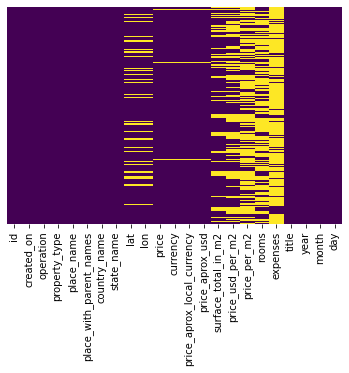

In [24]:
#visualizing the null values using heatmap
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
#dropping some features that seems unnecessary to me
df.drop(['id','expenses','lon','price','created_on','title', 'place_with_parent_names', 'price_aprox_local_currency'], axis = 1, inplace =True)

<AxesSubplot:>

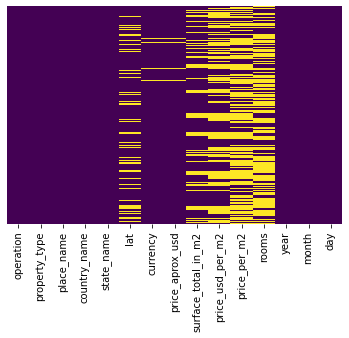

In [26]:
#visualizing again
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
#converting categorical to numerical
df.loc[df['property_type'] == 'apartment', 'property_type'] = 1
df.loc[df['property_type'] == 'house', 'property_type'] = 2
df.loc[df['property_type'] == 'store', 'property_type'] = 3
df.loc[df['property_type'] == 'PH', 'property_type'] = 4

In [28]:
#converting categorical to numerical
df.loc[df['operation'] == 'rent', 'operation'] = 1
df.loc[df['operation'] == 'sell', 'operation'] = 2


In [29]:
df.info()#checking the info after conversion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78367 entries, 0 to 114200
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   operation            78367 non-null  object 
 1   property_type        78367 non-null  object 
 2   place_name           78367 non-null  object 
 3   country_name         78367 non-null  object 
 4   state_name           78367 non-null  object 
 5   lat                  61881 non-null  float64
 6   currency             77480 non-null  object 
 7   price_aprox_usd      77494 non-null  float64
 8   surface_total_in_m2  60945 non-null  float64
 9   price_usd_per_m2     45686 non-null  float64
 10  price_per_m2         31847 non-null  float64
 11  rooms                32594 non-null  float64
 12  year                 78367 non-null  int64  
 13  month                78367 non-null  int64  
 14  day                  78367 non-null  int64  
dtypes: float64(6), int64(3), object(6)


In [30]:
df.head(10)#checking the first ten rows

,operation,property_type,place_name,country_name,state_name,lat,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,year,month,day
0,1,1,Macul,Chile,Región Metropolitana,-33.486664,CLP,807.53,60.0,13.458833,9000.000000,2.0,2016,5,15
1,1,2,Colina,Chile,Región Metropolitana,NaN,CLP,2222.22,5000.0,0.444444,5481.481481,NaN,2016,4,14
2,1,2,Colina,Chile,Región Metropolitana,-33.310386,CLP,1271.12,480.0,2.648167,6071.428571,7.0,2015,12,8
3,1,2,Pucón,Chile,Región de la Araucanía,-39.293591,CLP,115.61,0.0,NaN,NaN,NaN,2016,2,4
4,1,1,Concón,Chile,Región de Valparaiso,NaN,CLP,1196.35,0.0,NaN,5714.285714,NaN,2016,6,25
5,1,2,Coronel,Chile,Región del Bío Bío,-36.990315,CLP,448.63,120.0,3.738583,857.142857,5.0,2016,5,31
6,1,2,El Tabo,Chile,Región de Valparaiso,-33.456302,CLP,52.34,4000.0,0.013085,411.764706,4.0,2016,5,10
7,1,1,Iquique,Chile,Región de Tarapacá,-20.225110,CLP,89.72,10.0,8.972000,NaN,1.0,2016,2,1
8,1,1,Iquique,Chile,Región de Tarapacá,-20.246541,CLP,149.54,88.0,1.699318,NaN,1.0,2016,3,16
9,1,2,Iquique,Chile,Región de Tarapacá,-20.264415,CLP,1046.80,107.0,9.783178,6603.773585,4.0,2016,6,13


In [31]:
#Filling the missing value in room with median because of numerous outliers present
df.groupby(['property_type'])['rooms'].median()

property_type
1    3.0
2    4.0
3    4.0
4    1.0
Name: rooms, dtype: float64

In [32]:
def rooms(cols):
    rooms = cols[1]
    property_type= cols[0]
    if pd.isnull(rooms):
        if property_type== 1:
            return 3
        elif property_type == 2:
            return 5
        elif property_type == 3:
            return 6
        else:
            return 1
    else:
        return rooms

In [33]:
#applying the code
df['rooms'] = df[['property_type','rooms']].apply(rooms,axis=1)

In [34]:
df['currency'].unique()#checking another feature

array(['CLP', 'CLF', nan, 'COP', 'USD'], dtype=object)

In [35]:
#converting to numerical
df.loc[df['currency'] == 'CLP', 'currency'] = 1
df.loc[df['currency'] == 'CLF', 'currency'] = 2
df.loc[df['currency'] == 'np.NaN', 'currency'] = 0
df.loc[df['currency'] == 'COP', 'currency'] = 3
df.loc[df['currency'] == 'USD', 'currency'] = 4


In [36]:
df['currency'].unique()#checking if it applied

array([1, 2, nan, 3, 4], dtype=object)

In [37]:
df['currency'] = df['currency'].fillna(0)#filling the na with zero

In [38]:
df['currency'].unique()#checking if it applied

array([1, 2, 0, 3, 4], dtype=int64)

In [39]:
df.head()

,operation,property_type,place_name,country_name,state_name,lat,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,year,month,day
0,1,1,Macul,Chile,Región Metropolitana,-33.486664,1,807.53,60.0,13.458833,9000.000000,2.0,2016,5,15
1,1,2,Colina,Chile,Región Metropolitana,NaN,1,2222.22,5000.0,0.444444,5481.481481,5.0,2016,4,14
2,1,2,Colina,Chile,Región Metropolitana,-33.310386,1,1271.12,480.0,2.648167,6071.428571,7.0,2015,12,8
3,1,2,Pucón,Chile,Región de la Araucanía,-39.293591,1,115.61,0.0,NaN,NaN,5.0,2016,2,4
4,1,1,Concón,Chile,Región de Valparaiso,NaN,1,1196.35,0.0,NaN,5714.285714,3.0,2016,6,25


In [40]:
df.describe()

,lat,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,year,month,day
count,61881.000000,78367.000000,7.749400e+04,60945.000000,45686.000000,3.184700e+04,78367.000000,78367.000000,78367.000000,78367.000000
mean,-33.216930,1.390892,2.547893e+05,622.420789,1291.413822,4.537233e+05,3.834816,2016.965317,7.533924,14.432925
std,2.796405,0.512494,3.718937e+05,4050.649722,1398.235794,1.339874e+06,1.690308,0.353192,3.034022,8.954823
min,-53.230181,0.000000,0.000000e+00,0.000000,0.000000,7.800000e-03,1.000000,2014.000000,1.000000,1.000000
25%,-33.455994,1.000000,4.680000e+03,34.000000,89.622000,7.500000e+01,3.000000,2017.000000,5.000000,6.000000
50%,-33.407196,1.000000,1.637810e+05,105.000000,1012.960000,6.666667e+03,3.000000,2017.000000,8.000000,14.000000
75%,-33.044015,2.000000,3.480040e+05,290.000000,2145.920305,8.245614e+05,5.000000,2017.000000,10.000000,22.000000
max,31.357528,4.000000,2.535000e+07,192000.000000,42250.000000,1.400000e+08,40.000000,2018.000000,12.000000,31.000000


In [41]:
#Filling the missing value in room.I used median because of numerous outliers
df.groupby(['property_type'])['rooms'].median()

property_type
1    3.0
2    5.0
3    6.0
4    1.0
Name: rooms, dtype: float64

In [42]:
def rooms(cols):
    rooms = cols[1]
    property_type= cols[0]
    if pd.isnull(rooms):
        if property_type== 1:
            return 3
        elif property_type == 2:
            return 5
        elif property_type == 3:
            return 6
        else:
            return 1
    else:
        return rooms

In [43]:
#applying the code
df['rooms'] = df[['property_type','rooms']].apply(rooms,axis=1)

In [44]:
df.head(10)#checking the info

,operation,property_type,place_name,country_name,state_name,lat,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,year,month,day
0,1,1,Macul,Chile,Región Metropolitana,-33.486664,1,807.53,60.0,13.458833,9000.000000,2.0,2016,5,15
1,1,2,Colina,Chile,Región Metropolitana,NaN,1,2222.22,5000.0,0.444444,5481.481481,5.0,2016,4,14
2,1,2,Colina,Chile,Región Metropolitana,-33.310386,1,1271.12,480.0,2.648167,6071.428571,7.0,2015,12,8
3,1,2,Pucón,Chile,Región de la Araucanía,-39.293591,1,115.61,0.0,NaN,NaN,5.0,2016,2,4
4,1,1,Concón,Chile,Región de Valparaiso,NaN,1,1196.35,0.0,NaN,5714.285714,3.0,2016,6,25
5,1,2,Coronel,Chile,Región del Bío Bío,-36.990315,1,448.63,120.0,3.738583,857.142857,5.0,2016,5,31
6,1,2,El Tabo,Chile,Región de Valparaiso,-33.456302,1,52.34,4000.0,0.013085,411.764706,4.0,2016,5,10
7,1,1,Iquique,Chile,Región de Tarapacá,-20.225110,1,89.72,10.0,8.972000,NaN,1.0,2016,2,1
8,1,1,Iquique,Chile,Región de Tarapacá,-20.246541,1,149.54,88.0,1.699318,NaN,1.0,2016,3,16
9,1,2,Iquique,Chile,Región de Tarapacá,-20.264415,1,1046.80,107.0,9.783178,6603.773585,4.0,2016,6,13


In [45]:
df['lat'].unique()#checking another feature

array([-33.486664  ,          nan, -33.3103858 , ..., -33.427095  ,
       -33.42275581, -33.4553076 ])

In [46]:
df['currency'].unique()#checking another feature

array([1, 2, 0, 3, 4], dtype=int64)

In [47]:
#converting to numerical
df.loc[df['currency'] == 'CLP', 'currency'] = 1
df.loc[df['currency'] == 'CLF', 'currency'] = 2
df.loc[df['currency'] == 'np.NaN', 'currency'] = 0
df.loc[df['currency'] == 'COP', 'currency'] = 3
df.loc[df['currency'] == 'USD', 'currency'] = 4


In [48]:
df['currency'].unique()#checking if it applied

array([1, 2, 0, 3, 4], dtype=int64)

In [49]:
df.groupby(['currency'])['lat'].mean()#filling with median becuse of outliers

currency
0   -32.821099
1   -33.271519
2   -33.136880
3   -32.968781
4   -33.608187
Name: lat, dtype: float64

In [50]:
def lat(cols):
    lat = cols[1]
    currency= cols[0]
    if pd.isnull(lat):
        if currency== 0:
            return -32.776469
        elif currency == 1:
            return -33.282038
        elif currency == 2:
            return -33.046364
        elif currency == 3:
            return -71.545852
        else:
            return -70.708155
    else:
        return lat

In [51]:
#applying the code to reflect in the dataframe
df['lat'] = df[['currency','lat']].apply(lat,axis=1)

In [52]:
df.head(10)

,operation,property_type,place_name,country_name,state_name,lat,currency,price_aprox_usd,surface_total_in_m2,price_usd_per_m2,price_per_m2,rooms,year,month,day
0,1,1,Macul,Chile,Región Metropolitana,-33.486664,1,807.53,60.0,13.458833,9000.000000,2.0,2016,5,15
1,1,2,Colina,Chile,Región Metropolitana,-33.282038,1,2222.22,5000.0,0.444444,5481.481481,5.0,2016,4,14
2,1,2,Colina,Chile,Región Metropolitana,-33.310386,1,1271.12,480.0,2.648167,6071.428571,7.0,2015,12,8
3,1,2,Pucón,Chile,Región de la Araucanía,-39.293591,1,115.61,0.0,NaN,NaN,5.0,2016,2,4
4,1,1,Concón,Chile,Región de Valparaiso,-33.282038,1,1196.35,0.0,NaN,5714.285714,3.0,2016,6,25
5,1,2,Coronel,Chile,Región del Bío Bío,-36.990315,1,448.63,120.0,3.738583,857.142857,5.0,2016,5,31
6,1,2,El Tabo,Chile,Región de Valparaiso,-33.456302,1,52.34,4000.0,0.013085,411.764706,4.0,2016,5,10
7,1,1,Iquique,Chile,Región de Tarapacá,-20.225110,1,89.72,10.0,8.972000,NaN,1.0,2016,2,1
8,1,1,Iquique,Chile,Región de Tarapacá,-20.246541,1,149.54,88.0,1.699318,NaN,1.0,2016,3,16
9,1,2,Iquique,Chile,Región de Tarapacá,-20.264415,1,1046.80,107.0,9.783178,6603.773585,4.0,2016,6,13


<AxesSubplot:>

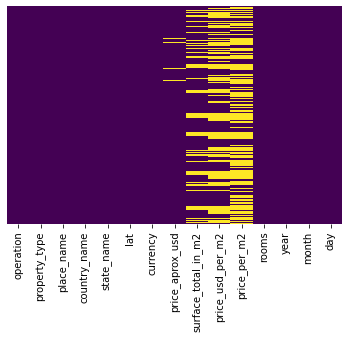

In [53]:
#visualising the amount of missing values again to get a better view
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [54]:
#dropping some features that seem irrelevant feature
df.drop(['price_aprox_usd','price_per_m2'], axis = 1, inplace =True)

In [55]:
df

,operation,property_type,place_name,country_name,state_name,lat,currency,surface_total_in_m2,price_usd_per_m2,rooms,year,month,day
0,1,1,Macul,Chile,Región Metropolitana,-33.486664,1,60.0,13.458833,2.0,2016,5,15
1,1,2,Colina,Chile,Región Metropolitana,-33.282038,1,5000.0,0.444444,5.0,2016,4,14
2,1,2,Colina,Chile,Región Metropolitana,-33.310386,1,480.0,2.648167,7.0,2015,12,8
3,1,2,Pucón,Chile,Región de la Araucanía,-39.293591,1,0.0,NaN,5.0,2016,2,4
4,1,1,Concón,Chile,Región de Valparaiso,-33.282038,1,0.0,NaN,3.0,2016,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114196,1,2,La Dehesa,Chile,Región Metropolitana,-33.351336,2,2000.0,1.482000,5.0,2017,10,2
114197,1,1,La Dehesa,Chile,Región Metropolitana,-33.354360,1,0.0,NaN,3.0,2017,10,2
114198,1,1,La Dehesa,Chile,Región Metropolitana,-33.363062,1,0.0,NaN,3.0,2017,10,17
114199,1,2,El Huinganal,Chile,Región Metropolitana,-33.282038,1,1120.0,3.574000,5.0,2017,4,6


In [56]:
df.interpolate()

,operation,property_type,place_name,country_name,state_name,lat,currency,surface_total_in_m2,price_usd_per_m2,rooms,year,month,day
0,1,1,Macul,Chile,Región Metropolitana,-33.486664,1,60.0,13.458833,2.0,2016,5,15
1,1,2,Colina,Chile,Región Metropolitana,-33.282038,1,5000.0,0.444444,5.0,2016,4,14
2,1,2,Colina,Chile,Región Metropolitana,-33.310386,1,480.0,2.648167,7.0,2015,12,8
3,1,2,Pucón,Chile,Región de la Araucanía,-39.293591,1,0.0,3.011639,5.0,2016,2,4
4,1,1,Concón,Chile,Región de Valparaiso,-33.282038,1,0.0,3.375111,3.0,2016,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
114196,1,2,La Dehesa,Chile,Región Metropolitana,-33.351336,2,2000.0,1.482000,5.0,2017,10,2
114197,1,1,La Dehesa,Chile,Región Metropolitana,-33.354360,1,0.0,2.179333,3.0,2017,10,2
114198,1,1,La Dehesa,Chile,Región Metropolitana,-33.363062,1,0.0,2.876667,3.0,2017,10,17
114199,1,2,El Huinganal,Chile,Región Metropolitana,-33.282038,1,1120.0,3.574000,5.0,2017,4,6


In [57]:
df.isnull().sum()

operation                  0
property_type              0
place_name                 0
country_name               0
state_name                 0
lat                        0
currency                   0
surface_total_in_m2    17422
price_usd_per_m2       32681
rooms                      0
year                       0
month                      0
day                        0
dtype: int64

In [58]:
df['surface_total_in_m2'] = df['surface_total_in_m2'].fillna(value=df['rooms'])
df['surface_total_in_m2'].isnull().sum()

0

<AxesSubplot:>

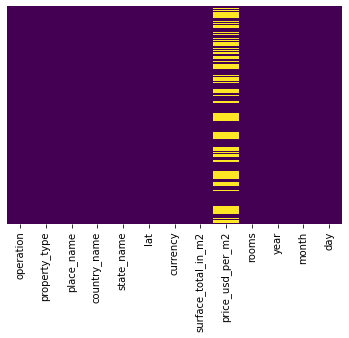

In [59]:
#visualising the amount of missing values again to get a better view
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [60]:
df['price_usd_per_m2'] = df['price_usd_per_m2'].fillna(value=df['currency'])
df['currency'].isnull().sum()

0

In [61]:
df.columns

Index(['operation', 'property_type', 'place_name', 'country_name',
       'state_name', 'lat', 'currency', 'surface_total_in_m2',
       'price_usd_per_m2', 'rooms', 'year', 'month', 'day'],
      dtype='object')

<AxesSubplot:>

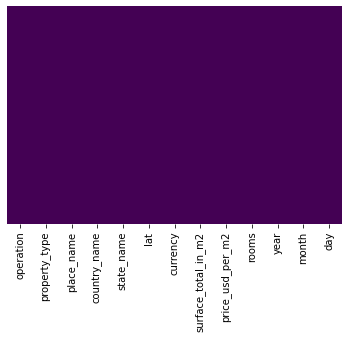

In [62]:
#visualising the amount of missing values again to get a better view
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [63]:
df.isnull().sum()

operation              0
property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
currency               0
surface_total_in_m2    0
price_usd_per_m2       0
rooms                  0
year                   0
month                  0
day                    0
dtype: int64

# Data Analysis

In [64]:
#Seperating the dataframe into categorical and numerical data
def check_variables(df: pd.DataFrame):
    cols = df.columns
    quantitative_cols = df._get_numeric_data().columns
    categorical_cols = list(set(cols) - set(quantitative_cols))
    return categorical_cols, list(set(quantitative_cols))

In [65]:
cat_cols, quan_cols = check_variables(df)
print(f'categorical columns: {cat_cols}')
print(f'quantitative columns: {quan_cols}')

categorical columns: ['property_type', 'operation', 'place_name', 'state_name', 'country_name']
quantitative columns: ['month', 'lat', 'rooms', 'surface_total_in_m2', 'day', 'currency', 'year', 'price_usd_per_m2']


CATEGORICAL VARIABLES

In [66]:
num_vars = df.columns[df.dtypes != 'object']
cat_vars = df.columns[df.dtypes == 'object']

print(num_vars)
print(num_vars)

Index(['lat', 'currency', 'surface_total_in_m2', 'price_usd_per_m2', 'rooms',
       'year', 'month', 'day'],
      dtype='object')
Index(['lat', 'currency', 'surface_total_in_m2', 'price_usd_per_m2', 'rooms',
       'year', 'month', 'day'],
      dtype='object')


In [67]:
#Analysing the property_type
df['property_type'].describe()

count     78367
unique        4
top           1
freq      41354
Name: property_type, dtype: int64

In [68]:
df['property_type'].value_counts()

1    41354
2    33876
3     3132
4        5
Name: property_type, dtype: int64

<AxesSubplot:ylabel='property_type'>

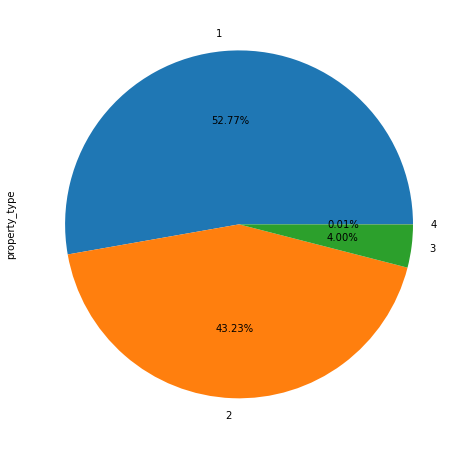

In [69]:
df.groupby('property_type').size().plot(kind='pie',ylabel='property_type',
autopct='%.2f%%',figsize=[8,8])

<AxesSubplot:xlabel='property_type'>

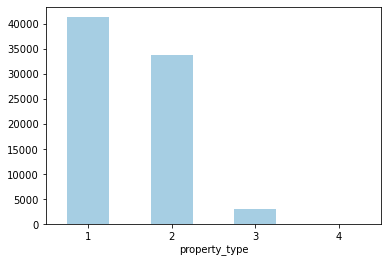

In [70]:
df.groupby('property_type').size().plot(kind='bar', rot=0,
colormap='Paired')

In [71]:
df['place_name'].describe()

count          78367
unique           228
top       Las Condes
freq           11533
Name: place_name, dtype: object

In [72]:
df['place_name'].describe().transpose()

count          78367
unique           228
top       Las Condes
freq           11533
Name: place_name, dtype: object

<AxesSubplot:ylabel='place_name'>

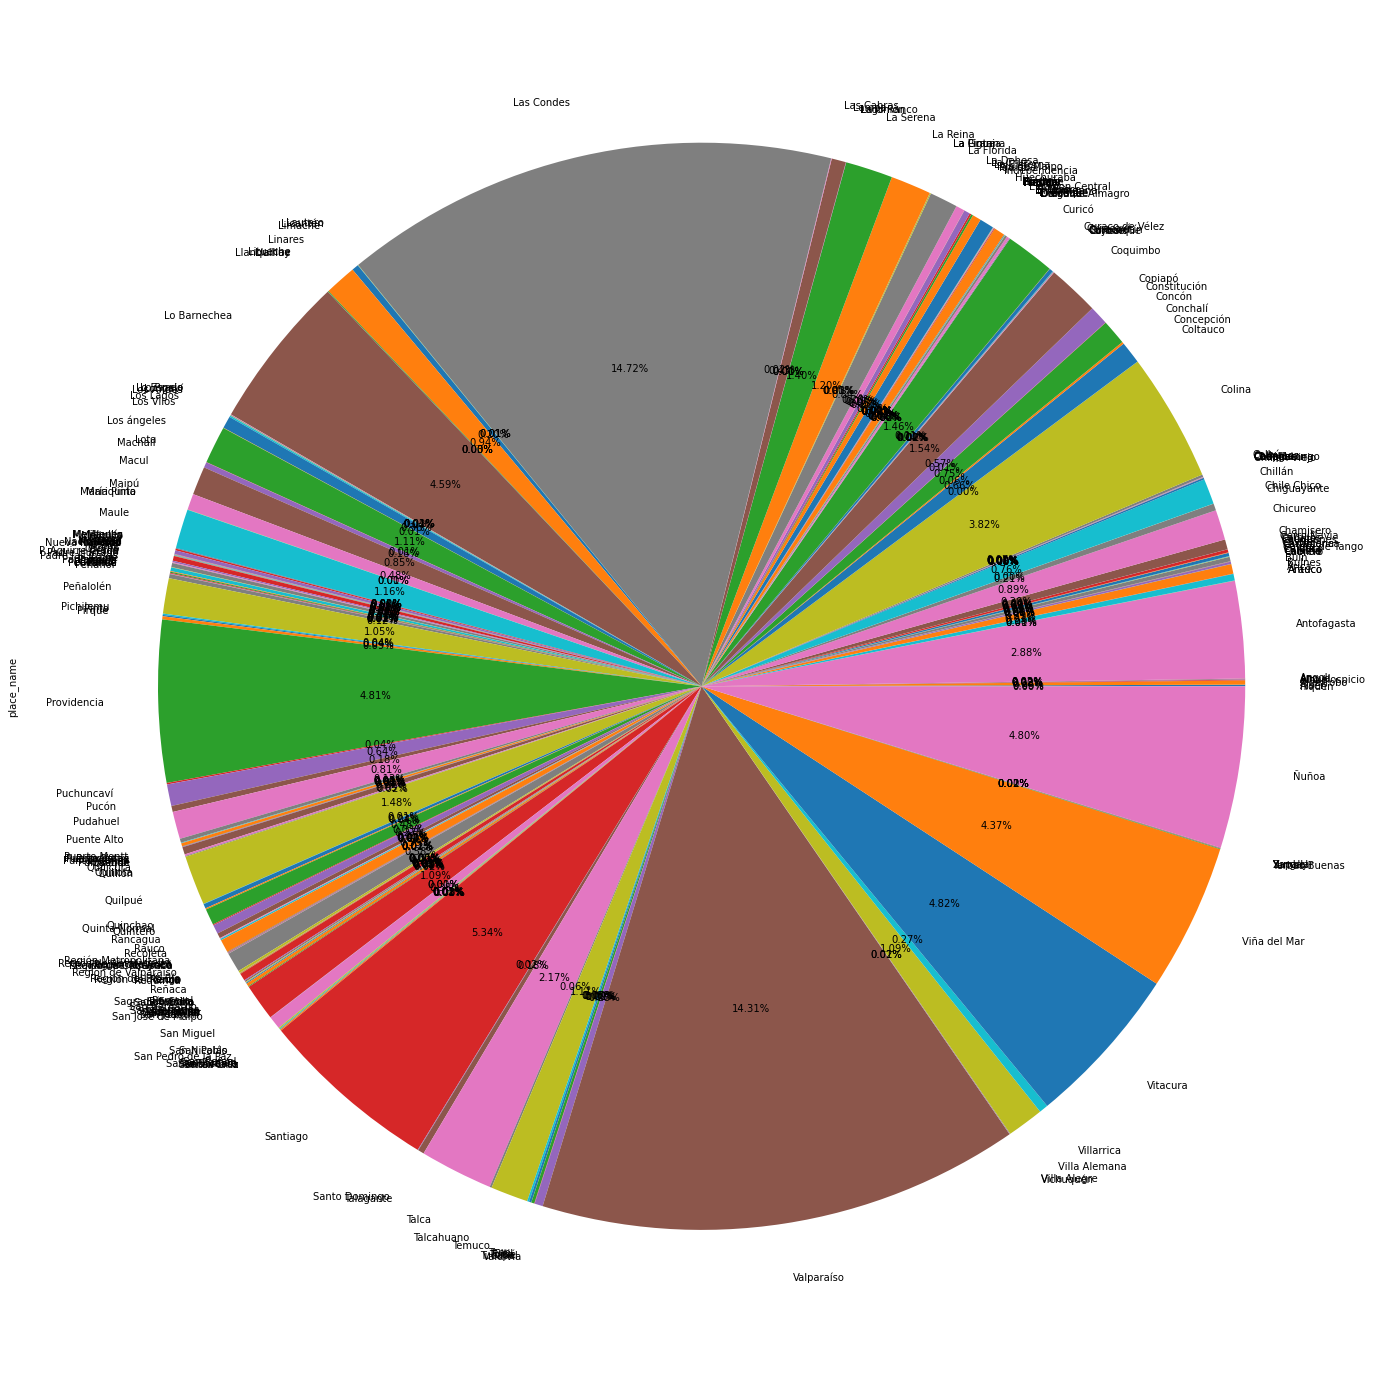

In [73]:
df.groupby('place_name').size().plot(kind='pie',ylabel='place_name',
autopct='%.2f%%',figsize=[25,25])


<AxesSubplot:xlabel='state_name'>

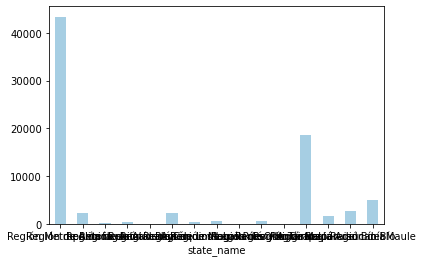

In [74]:
df.groupby('state_name').size().plot(kind='bar', rot=0,
colormap='Paired')






In [75]:
df['operation'].describe()

count     78367
unique        2
top           2
freq      57773
Name: operation, dtype: int64

<AxesSubplot:ylabel='operation'>

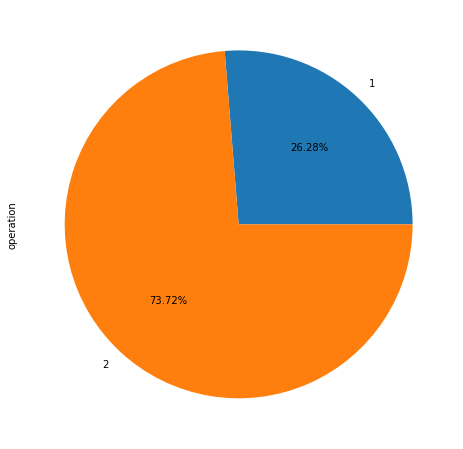

In [76]:
df.groupby('operation').size().plot(kind='pie',ylabel='operation',
autopct='%.2f%%',figsize=[8,8])

<AxesSubplot:xlabel='operation'>

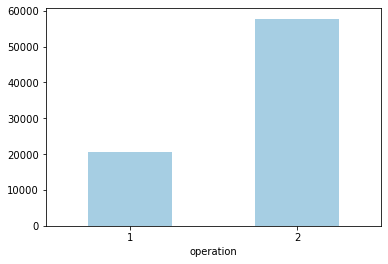

In [77]:
df.groupby('operation').size().plot(kind='bar', rot=0,
colormap='Paired')


In [78]:
df['property_type'].describe()

count     78367
unique        4
top           1
freq      41354
Name: property_type, dtype: int64

<AxesSubplot:ylabel='property_type'>

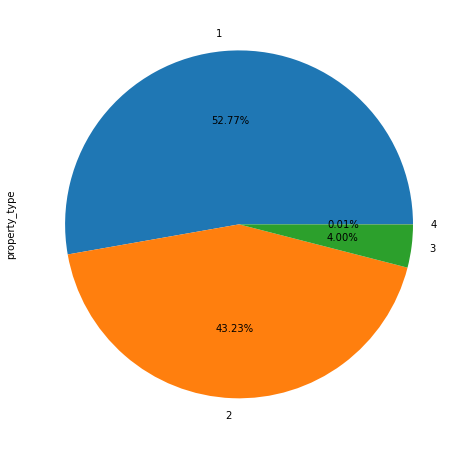

In [79]:
df.groupby('property_type').size().plot(kind='pie',ylabel='property_type',
autopct='%.2f%%',figsize=[8,8])

<AxesSubplot:xlabel='property_type'>

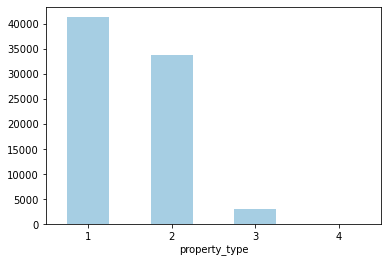

In [80]:
df.groupby('property_type').size().plot(kind='bar', rot=0,
colormap='Paired')


In [81]:
df['state_name'].describe().transpose()

count                    78367
unique                      15
top       Región Metropolitana
freq                     43378
Name: state_name, dtype: object

<AxesSubplot:ylabel='state_name'>

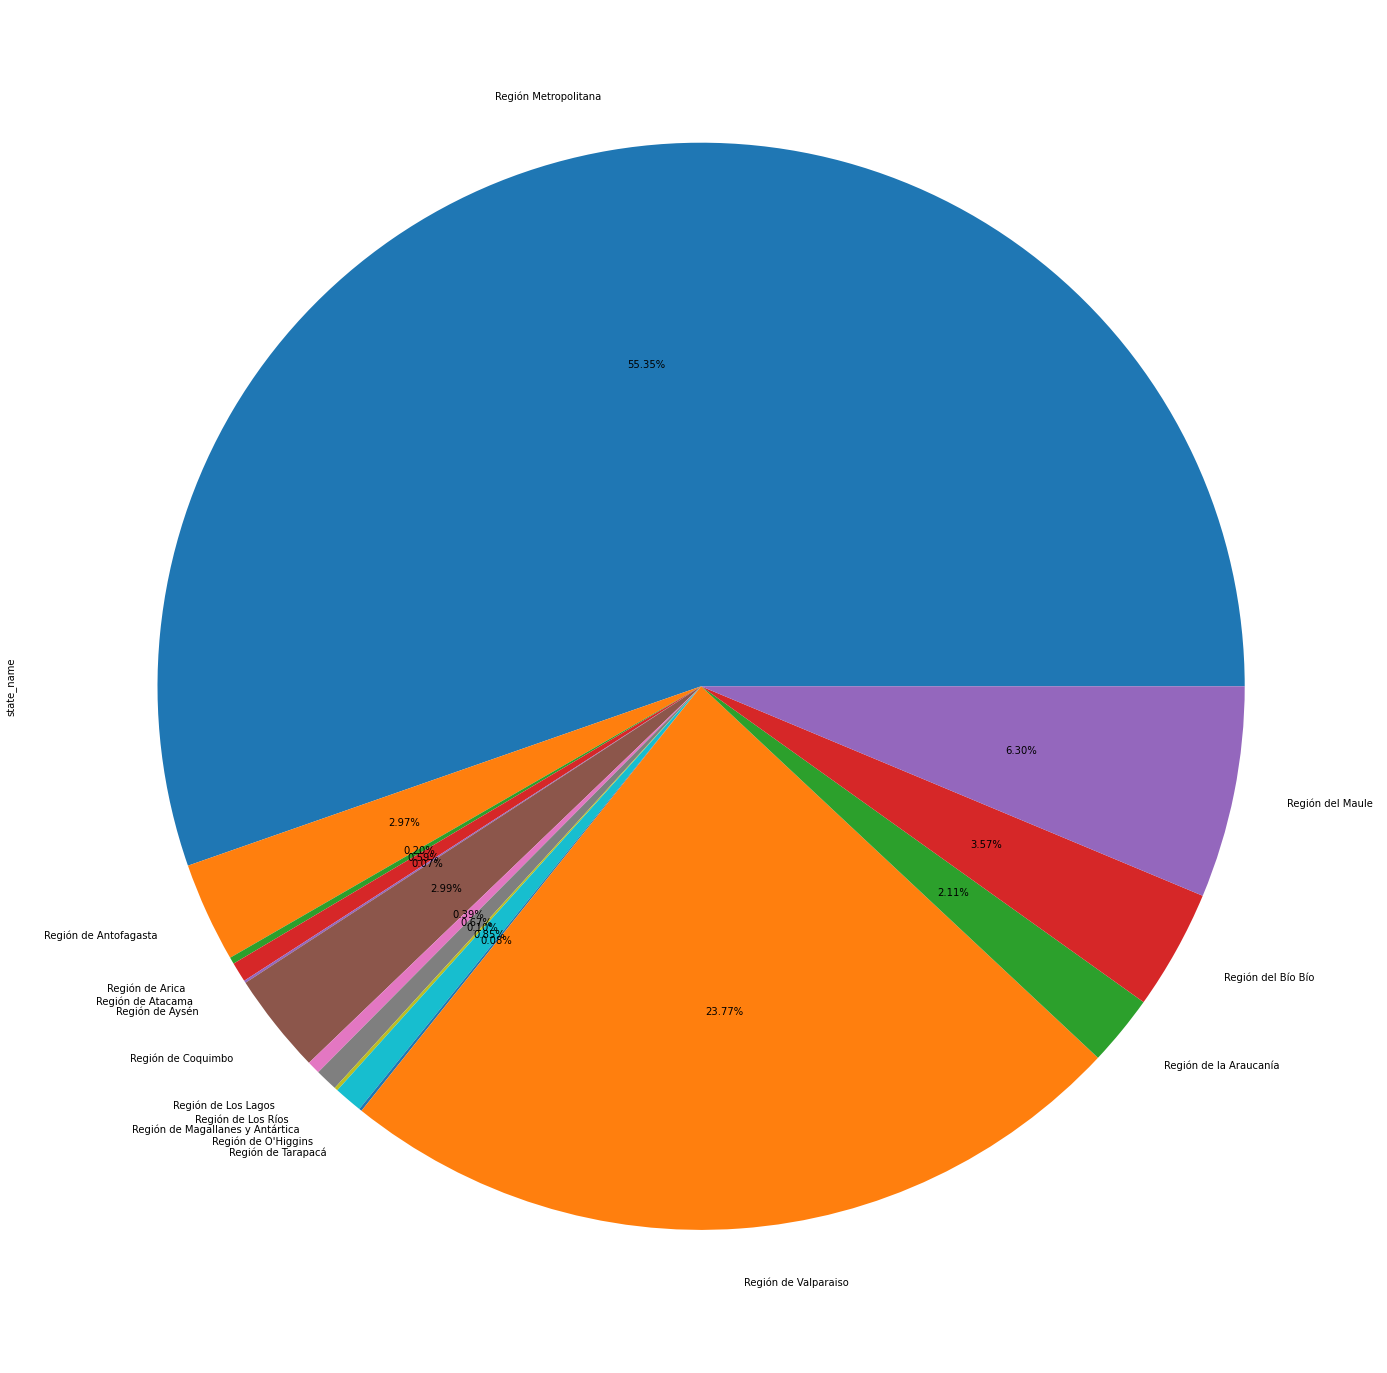

In [82]:
df.groupby('state_name').size().plot(kind='pie',ylabel='state_name',
autopct='%.2f%%',figsize=[25,25])

NUMERICAL VARIABLES

In [83]:
df['rooms'].describe()

count    78367.000000
mean         3.834816
std          1.690308
min          1.000000
25%          3.000000
50%          3.000000
75%          5.000000
max         40.000000
Name: rooms, dtype: float64

Text(0.5, 1.0, 'Histogram of Rooms')

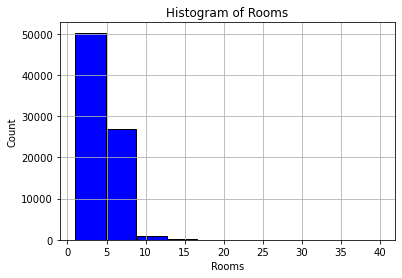

In [84]:
df['rooms'].hist(bins=20)
age = df['rooms']
plt.hist(x=age, histtype='bar',color='blue',edgecolor='black')
plt.xlabel('Rooms')
plt.ylabel('Count')
plt.title('Histogram of Rooms')

Text(0, 0.5, 'count')

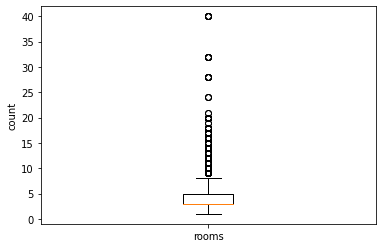

In [85]:
plt.boxplot(x=df['rooms'], labels=['rooms'])
plt.ylabel('count')

In [86]:
df['surface_total_in_m2'].describe()

count     78367.000000
mean        484.737619
std        3581.392595
min           0.000000
25%           2.000000
50%          67.000000
75%         200.000000
max      192000.000000
Name: surface_total_in_m2, dtype: float64

Text(0.5, 1.0, 'Histogram of surface_total_in_m2')

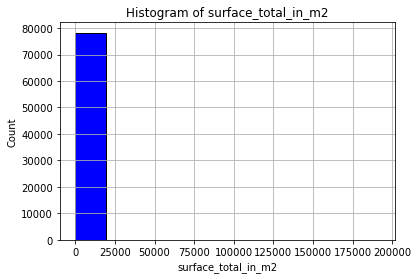

In [87]:
df['surface_total_in_m2'].hist(bins=20)
age = df['surface_total_in_m2']
plt.hist(x=age, histtype='bar',color='blue',edgecolor='black')
plt.xlabel('surface_total_in_m2')
plt.ylabel('Count')
plt.title('Histogram of surface_total_in_m2')

Text(0, 0.5, 'count')

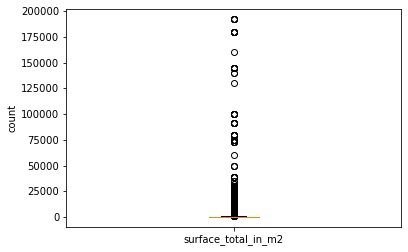

In [88]:
plt.boxplot(x=df['surface_total_in_m2'], labels=['surface_total_in_m2'])
plt.ylabel('count')

In [89]:
df['surface_total_in_m2'].mean()

484.73761915091814

In [90]:
df['surface_total_in_m2'].median()

67.0

In [91]:
df['surface_total_in_m2'].mode()

0    0.0
dtype: float64

In [92]:
Q25 = df['surface_total_in_m2'].quantile(0.25)
Q25

2.0

In [100]:
Q75 = df['surface_total_in_m2'].quantile(0.75)
Q75

200.0

In [101]:
IQR = Q75 - Q25
IQR

198.0

In [102]:
below_outlier = Q25-1.5*IQR
below_outlier

-295.0

In [103]:
above_outlier=Q75 + 1.5 *IQR
above_outlier

497.0

In [104]:
df['price_usd_per_m2'].describe().transpose()

count    78367.000000
mean       753.393391
std       1242.740224
min          0.000000
25%          1.000000
50%         10.370500
75%       1306.500000
max      42250.000000
Name: price_usd_per_m2, dtype: float64

Text(0.5, 1.0, 'Histogram of surface_total_in_m2')

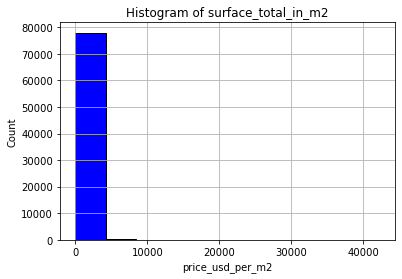

In [105]:
df['price_usd_per_m2'].hist(bins=20)
age = df['price_usd_per_m2']
plt.hist(x=age, histtype='bar',color='blue',edgecolor='black')
plt.xlabel('price_usd_per_m2')
plt.ylabel('Count')
plt.title('Histogram of surface_total_in_m2')

In [106]:
df['currency'].describe().transpose()

count    78367.000000
mean         1.390892
std          0.512494
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: currency, dtype: float64

Text(0.5, 1.0, 'Histogram of surface_total_in_m2')

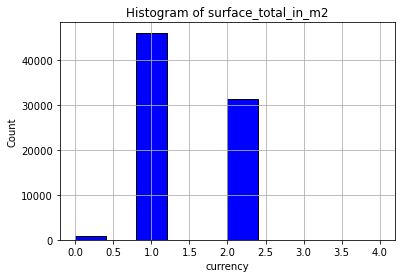

In [107]:
df['currency'].hist(bins=20)
age = df['currency']
plt.hist(x=age, histtype='bar',color='blue',edgecolor='black')
plt.xlabel('currency')
plt.ylabel('Count')
plt.title('Histogram of surface_total_in_m2')

Text(0, 0.5, 'count')

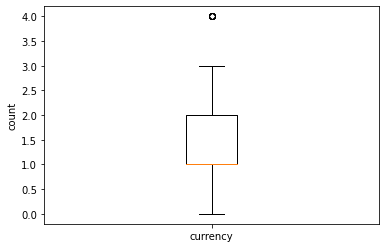

In [108]:
plt.boxplot(x=df['currency'], labels=['currency'])
plt.ylabel('count')

In [109]:
numeric = df._get_numeric_data().columns#checking the numeric columns
numeric

Index(['lat', 'currency', 'surface_total_in_m2', 'price_usd_per_m2', 'rooms',
       'year', 'month', 'day'],
      dtype='object')

Examine the relationship between selected categorical variables from the dataset, a pair (C->C)

In [1]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [111]:
from tabulate import tabulate

In [112]:
#operation and property_type
df1 = pd.crosstab(df.property_type, df.operation,margins=True)

print(tabulate(df1,headers ="keys", tablefmt ='fancy_grid',))

╒═════════════════╤═══════╤═══════╤═══════╕
│ property_type   │     1 │     2 │   All │
╞═════════════════╪═══════╪═══════╪═══════╡
│ 1               │ 13780 │ 27574 │ 41354 │
├─────────────────┼───────┼───────┼───────┤
│ 2               │  5052 │ 28824 │ 33876 │
├─────────────────┼───────┼───────┼───────┤
│ 3               │  1762 │  1370 │  3132 │
├─────────────────┼───────┼───────┼───────┤
│ 4               │     0 │     5 │     5 │
├─────────────────┼───────┼───────┼───────┤
│ All             │ 20594 │ 57773 │ 78367 │
╘═════════════════╧═══════╧═══════╧═══════╛



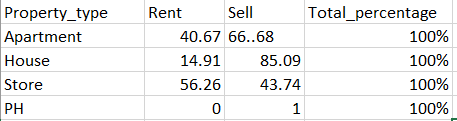

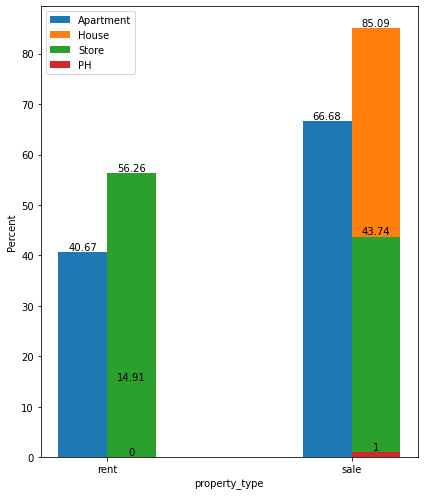

In [113]:
#operation and property_type
labels = ['rent', 'sale']
Apartment_percentage = [40.67, 66.68]
House_percentage = [14.91, 85.09]
Store_percentage = [56.26,43.74]
PH_percentage = [0,1]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x - width/2, Apartment_percentage, width, label='Apartment')
rects2 = ax.bar(x + width/2, House_percentage, width,
label='House')
rects3 = ax.bar(x +  width/2, Store_percentage, width, label='Store')
rects4 = ax.bar(x + width/2, PH_percentage, width, label='PH')

ax.set_ylabel('Percent')
ax.set_xlabel('property_type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1) #padding=3)
ax.bar_label(rects2) #padding=3)
ax.bar_label(rects3) #padding=0)
ax.bar_label(rects4) #padding=0)
fig.tight_layout()



In [114]:
#state__name and property_type
df1 = pd.crosstab(df.state_name, df.property_type,margins=True)

print(tabulate(df1,headers ="keys", tablefmt ='fancy_grid',))

╒══════════════════════════════════╤═══════╤═══════╤══════╤═════╤═══════╕
│ state_name                       │     1 │     2 │    3 │   4 │   All │
╞══════════════════════════════════╪═══════╪═══════╪══════╪═════╪═══════╡
│ Región Metropolitana             │ 25644 │ 16355 │ 1378 │   1 │ 43378 │
├──────────────────────────────────┼───────┼───────┼──────┼─────┼───────┤
│ Región de Antofagasta            │  1521 │   716 │   86 │   4 │  2327 │
├──────────────────────────────────┼───────┼───────┼──────┼─────┼───────┤
│ Región de Arica                  │    65 │    91 │    0 │   0 │   156 │
├──────────────────────────────────┼───────┼───────┼──────┼─────┼───────┤
│ Región de Atacama                │   160 │   303 │    0 │   0 │   463 │
├──────────────────────────────────┼───────┼───────┼──────┼─────┼───────┤
│ Región de Aysén                  │     3 │    24 │   28 │   0 │    55 │
├──────────────────────────────────┼───────┼───────┼──────┼─────┼───────┤
│ Región de Coquimbo               │  

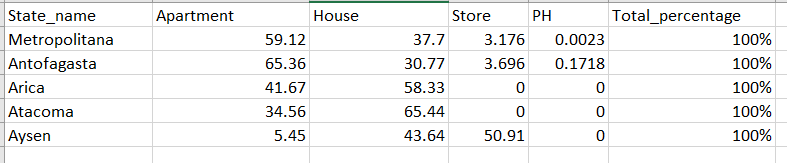

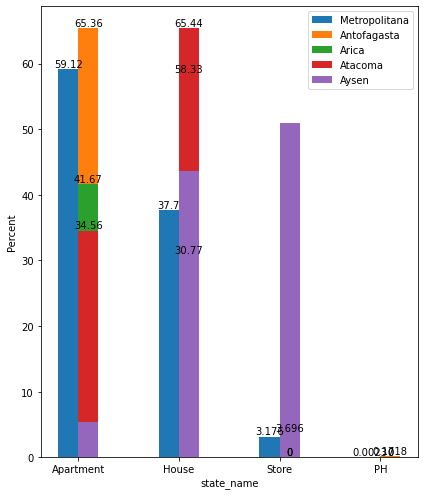

In [115]:
#state_name and property_type.plotting the top five
labels = ['Apartment', 'House','Store','PH']
Metropolitana_percentage = [59.12, 37.7,3.176,0.0023]
Antofagasta_percentage = [65.36,30.77, 3.696,0.1718]
Arica_percentage = [41.67,58.33,0,0]
Atacoma_percentage = [34.56,65.44,0,0]
Aysen_percentage = [5.45,43.64,50.91,0]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x - width/2, Metropolitana_percentage, width, label='Metropolitana')
rects2 = ax.bar(x + width/2, Antofagasta_percentage, width,
label='Antofagasta')
rects3 = ax.bar(x +  width/2, Arica_percentage, width, label='Arica')
rects4 = ax.bar(x + width/2, Atacoma_percentage, width, label ='Atacoma')
rects5 = ax.bar(x + width/2, Aysen_percentage, width,  label ='Aysen')

ax.set_ylabel('Percent')
ax.set_xlabel('state_name')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1) #padding=3)
ax.bar_label(rects2) #padding=3)
ax.bar_label(rects3) #padding=0)
ax.bar_label(rects4) #padding=0)
fig.tight_layout()

In [116]:
#state_name and operation
df1 = pd.crosstab(df.state_name, df.operation,margins=True)

print(tabulate(df1,headers ="keys", tablefmt ='fancy_grid',))

╒══════════════════════════════════╤═══════╤═══════╤═══════╕
│ state_name                       │     1 │     2 │   All │
╞══════════════════════════════════╪═══════╪═══════╪═══════╡
│ Región Metropolitana             │ 12080 │ 31298 │ 43378 │
├──────────────────────────────────┼───────┼───────┼───────┤
│ Región de Antofagasta            │   917 │  1410 │  2327 │
├──────────────────────────────────┼───────┼───────┼───────┤
│ Región de Arica                  │    52 │   104 │   156 │
├──────────────────────────────────┼───────┼───────┼───────┤
│ Región de Atacama                │   117 │   346 │   463 │
├──────────────────────────────────┼───────┼───────┼───────┤
│ Región de Aysén                  │     3 │    52 │    55 │
├──────────────────────────────────┼───────┼───────┼───────┤
│ Región de Coquimbo               │   775 │  1572 │  2347 │
├──────────────────────────────────┼───────┼───────┼───────┤
│ Región de Los Lagos              │    38 │   265 │   303 │
├───────────────────────

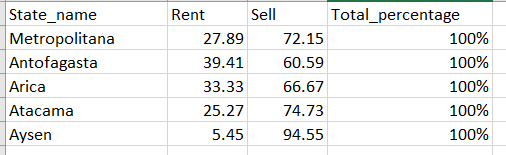

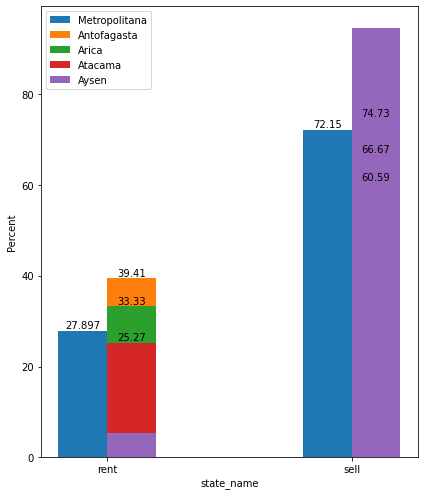

In [117]:
#plotting the top five
labels = ['rent', 'sell']
Metropolitana_percentage = [27.897, 72.15]
Antofagasta_percentage = [39.41, 60.59]
Arica_percentage = [33.33,66.67]
Atacama_percentage = [25.27,74.73]
Aysen_percentage = [5.45,94.55]
x = np.arange(len(labels))
width = 0.2
fig, ax = plt.subplots(figsize=(6,7))
rects1 = ax.bar(x - width/2, Metropolitana_percentage, width, label='Metropolitana')
rects2 = ax.bar(x + width/2, Antofagasta_percentage, width,
label='Antofagasta')
rects3 = ax.bar(x +  width/2, Arica_percentage, width, label='Arica')
rects4 = ax.bar(x + width/2, Atacama_percentage, width, label='Atacama')
rects5 = ax.bar(x + width/2, Aysen_percentage, width, label='Aysen')


ax.set_ylabel('Percent')
ax.set_xlabel('state_name')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.bar_label(rects1) #padding=3)
ax.bar_label(rects2) #padding=3)
ax.bar_label(rects3) #padding=0)
ax.bar_label(rects4) #padding=0)
fig.tight_layout()




Examine the relationship between categorical variables from the dataset, a pair (C->-Q)

In [120]:
df[['price_usd_per_m2','state_name']].groupby('state_name').describe().transpose()

state_name              Región Metropolitana  Región de Antofagasta  \
price_usd_per_m2 count          43378.000000            2327.000000   
                 mean            1031.796241             830.860148   
                 std             1471.098135            1078.758732   
                 min                0.000000               0.000000   
                 25%                2.000000               2.000000   
                 50%              141.142164              13.034200   
                 75%             1973.684230            1847.368421   
                 max            42250.000000           15600.000000   

state_name              Región de Arica  Región de Atacama  Región de Aysén  \
price_usd_per_m2 count       156.000000         463.000000        55.000000   
                 mean        547.834044         246.625073       191.585825   
                 std         638.436448         626.020963       622.912908   
                 min           1.000000           0.000000         0.000000   
                 25%           5.123703           1.000000         1.000000   
                 50%         174.910334           1.000000         2.000000   
                 75%        1046.797500           3.000000        71.542465   
                 max        2202.962143        3466.666667      2643.333333   

state_name              Región de Coquimbo  Región de Los Lagos  \
price_usd_per_m2 count         2347.000000           303.000000   
                 mean           481.511596           308.248424   
                 std            843.724168           437.385170   
                 min              0.000000             0.000000   
                 25%              1.000000             8.863636   
                 50%              2.000000           157.121531   
                 75%            735.000000           353.146494   
                 max           6167.763125          2451.428571   

state_name              Región de Los Ríos  Región de Magallanes y Antártica  \
price_usd_per_m2 count          523.000000                         79.000000   
                 mean           569.589075                        552.078978   
                 std            712.279595                        623.882072   
                 min              0.000000                          1.000000   
                 25%              7.917094                          4.051517   
                 50%            312.360200                        374.400000   
                 75%            841.279141                        989.661654   
                 max           3218.749500                       2893.992933   

state_name              Región de O'Higgins  Región de Tarapacá  \
price_usd_per_m2 count           663.000000           65.000000   
                 mean            299.183247          270.971182   
                 std             504.583110          517.158955   
                 min               0.000000            0.768046   
                 25%               2.000000            1.000000   
                 50%              29.944247            2.000000   
                 75%             445.758320          337.955333   
                 max            3061.936132         2052.631579   

state_name              Región de Valparaiso  Región de la Araucanía  \
price_usd_per_m2 count          18624.000000             1652.000000   
                 mean             413.033043              625.018601   
                 std              754.293558              960.444062   
                 min                0.000000                0.000000   
                 25%                1.000000                1.000000   
                 50%                2.000000               11.958732   
                 75%              633.176390             1040.367718   
                 max            24916.099840             4260.504202   

state_name              Región del Bío Bío  Región del Maule  
price_u

<AxesSubplot:xlabel='price_usd_per_m2', ylabel='state_name'>

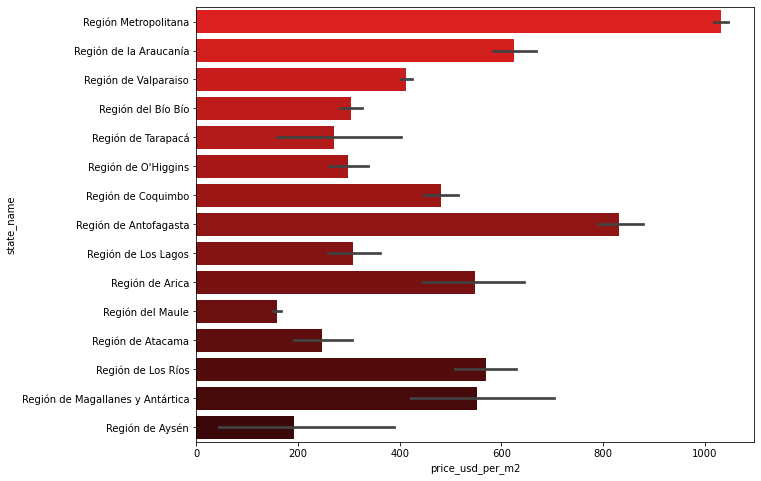

In [119]:
plt.figure(figsize=(10,8))
sns.barplot(y='state_name',x='price_usd_per_m2',data=df,palette='flag')

In [ ]:
df[['price_usd_per_m2','state_name']].groupby('state_name').mean()

In [ ]:
df[['price_usd_per_m2','state_name']].groupby('state_name').median()

In [ ]:
df[['price_usd_per_m2','state_name']].groupby('state_name').std()

In [ ]:
min_ = df[['price_usd_per_m2','state_name']].groupby('state_name').min()

In [ ]:
max_ = df[['price_usd_per_m2','state_name']].groupby('state_name').max()

In [ ]:
range_ = max_ - min_
range_


In [ ]:
Q25 =  df[['price_usd_per_m2','state_name']].groupby('state_name').quantile(0.25)
Q25

In [ ]:
Q75 =  df[['price_usd_per_m2','state_name']].groupby('state_name').quantile(0.75)
Q75

In [ ]:
IQR = Q75 - Q25
IQR

In [ ]:
below_outlier = Q25-1.5*IQR
below_outlier

In [ ]:
above_outlier=Q75 + 1.5 *IQR
above_outlier

In [ ]:
sns.boxplot(x="state_name", y="price_usd_per_m2", data=df,
order=["Región Metropolitana", "Región de Antofagasta","Región de Arica","Región de Aysén","Región de Coquimbo",
      "Región de Los Lagos","Región de Los Ríos","Región de Magallanes y Antártica","Región de O'Higgins",
      "Región de Tarapacá","Región de Valparaiso","Región de la Araucanía","Región del Bío Bío","Región del Maule"])

In [ ]:
df[['rooms','state_name']].groupby('state_name').describe()

In [ ]:
df1 = pd.crosstab(df.state_name, df.rooms,margins=True)

print(tabulate(df1,headers ="keys", tablefmt ='fancy_grid',))

In [ ]:
#using barchart for rooms and state_name
plt.figure(figsize=(10,8))
sns.barplot(y='state_name',x='rooms',data=df,palette='flag')

In [ ]:
df[['rooms','state_name']].groupby('state_name').mean()

In [ ]:
df[['rooms','state_name']].groupby('state_name').median()

In [ ]:
df[['rooms','state_name']].groupby('state_name').std()

In [ ]:
min_ = df[['rooms','state_name']].groupby('state_name').min()
min_

In [ ]:
max_ = df[['rooms','state_name']].groupby('state_name').max()
max_

In [ ]:
range_ = max_ - min_
range_


In [ ]:
Q25 =  df[['rooms','state_name']].groupby('state_name').quantile(0.25)
Q25

In [ ]:
Q75 =  df[['rooms','state_name']].groupby('state_name').quantile(0.75)
Q75

In [ ]:
IQR = Q75 - Q25
IQR

In [ ]:
below_outlier = Q25-1.5*IQR
below_outlier

In [ ]:
above_outlier=Q75 + 1.5 *IQR
above_outlier

<AxesSubplot:xlabel='state_name', ylabel='rooms'>

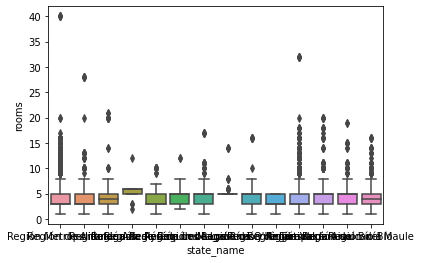

In [99]:
sns.boxplot(x="state_name", y="rooms", data=df,
order=["Región Metropolitana", "Región de Antofagasta","Región de Arica","Región de Aysén","Región de Coquimbo",
      "Región de Los Lagos","Región de Los Ríos","Región de Magallanes y Antártica","Región de O'Higgins",
      "Región de Tarapacá","Región de Valparaiso","Región de la Araucanía","Región del Bío Bío","Región del Maule"])

<AxesSubplot:xlabel='lat', ylabel='state_name'>

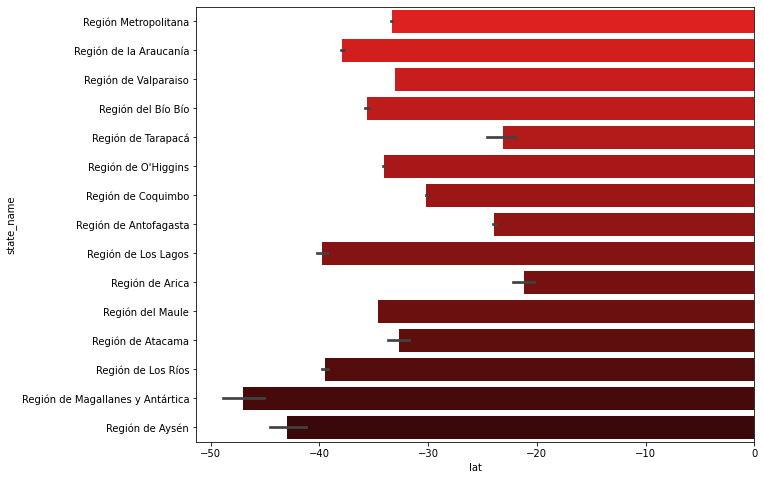

In [121]:
#state_name and latitude
plt.figure(figsize=(10,8))
sns.barplot(y='state_name',x='lat',data=df,palette='flag')

In [122]:
df[['lat','state_name']].groupby('state_name').describe().transpose()

state_name  Región Metropolitana  Región de Antofagasta  Región de Arica  \
lat count           43378.000000            2327.000000       156.000000   
    mean              -33.367966             -23.914695       -21.140119   
    std                 0.372588               2.909723         6.025127   
    min               -71.545852             -35.675147       -38.267530   
    25%               -33.446932             -23.695093       -18.488266   
    50%               -33.412329             -23.660701       -18.478471   
    75%               -33.304015             -23.592550       -18.459189   
    max               -18.478253              22.464969       -18.399867   

state_name  Región de Atacama  Región de Aysén  Región de Coquimbo  \
lat count          463.000000        55.000000         2347.000000   
    mean           -32.691436       -42.955440          -30.179540   
    std             11.105442         6.252756            0.908209   
    min            -71.545852       -45.628516          -35.846407   
    25%            -33.046364       -45.575415          -29.959763   
    50%            -27.400124       -45.574005          -29.934127   
    75%            -27.379958       -45.561853          -29.911858   
    max            -27.075177       -18.478253          -23.668208   

state_name  Región de Los Lagos  Región de Los Ríos  \
lat count            303.000000          523.000000   
    mean             -39.768452          -39.503678   
    std                4.184829            2.797160   
    min              -71.545852          -43.183300   
    25%              -42.466700          -41.319785   
    50%              -41.468917          -39.954551   
    75%              -35.675147          -39.796902   
    max              -33.046364          -32.942151   

state_name  Región de Magallanes y Antártica  Región de O'Higgins  \
lat count                          79.000000           663.000000   
    mean                          -47.045157           -34.081922   
    std                             9.069075             0.500997   
    min                           -53.230181           -35.675147   
    25%                           -53.152466           -34.182222   
    50%                           -53.129239           -34.170132   
    75%                           -33.282038           -34.140434   
    max                           -33.046364           -32.776469   

state_name  Región de Tarapacá  Región de Valparaiso  Región de la Araucanía  \
lat count            65.000000          18624.000000             1652.000000   
    mean            -23.112263            -33.055178              -37.891193   
    std               5.529798              0.268101                2.248542   
    min             -35.675147            -46.058056              -39.821907   
    25%             -20.273711            -33.051693              -39.274950   
    50%             -20.254182            -33.031636              -38.740865   
    75%             -20.234192            -32.969681              -38.716419   
    max             -20.202880            -28.904995              -32.776469   

state_name  Región del Bío Bío  Región del Maule  
lat count          2798.000000       4934.000000  
    mean            -35.598715        -34.614749  
    std               4.561735          1.005265  
    min             -71.545852        -36.606262  
    25%             -36.855325        -35.428070  
    50%             -36.609354        -34.978578  
    75%             -33.282038        -33.282038  
    max              31.357528        -32.776469

In [123]:
df[['lat','state_name']].groupby('state_name').describe().mean()

lat  count    5224.466667
     mean      -33.928034
     std         3.849290
     min       -48.790067
     25%       -34.681117
     50%       -34.053147
     75%       -31.972554
     max       -19.916628
dtype: float64

In [124]:
df[['lat','state_name']].groupby('state_name').describe().median()

lat  count    663.000000
     mean     -34.081922
     std        2.909723
     min      -43.183300
     25%      -34.182222
     50%      -34.170132
     75%      -33.282038
     max      -27.075177
dtype: float64

In [125]:
df[['lat','state_name']].groupby('state_name').describe().std()

lat  count    11544.823162
     mean         7.246570
     std          3.287065
     min         15.031042
     25%          9.299836
     50%          9.333101
     75%          7.239043
     max         19.979346
dtype: float64

In [126]:
min_ = df[['lat','state_name']].groupby('state_name').describe().min()
min_

lat  count    55.000000
     mean    -47.045157
     std       0.268101
     min     -71.545852
     25%     -53.152466
     50%     -53.129239
     75%     -45.561853
     max     -33.046364
dtype: float64

In [127]:
max_ = df[['lat','state_name']].groupby('state_name').describe().max()
max_

lat  count    43378.000000
     mean       -21.140119
     std         11.105442
     min        -35.675147
     25%        -18.488266
     50%        -18.478471
     75%        -18.459189
     max         31.357528
dtype: float64

In [128]:
Range = max_-min_
Range

lat  count    43323.000000
     mean        25.905038
     std         10.837341
     min         35.870705
     25%         34.664199
     50%         34.650768
     75%         27.102664
     max         64.403892
dtype: float64

In [129]:
Q25 =  df[['lat','state_name']].groupby('state_name').quantile(0.25)
Q25

,lat
state_name,
Región Metropolitana,-33.446932
Región de Antofagasta,-23.695093
Región de Arica,-18.488266
Región de Atacama,-33.046364
Región de Aysén,-45.575415
Región de Coquimbo,-29.959763
Región de Los Lagos,-42.466700
Región de Los Ríos,-41.319785
Región de Magallanes y Antártica,-53.152466


In [130]:
Q75 =  df[['lat','state_name']].groupby('state_name').quantile(0.75)
Q75

,lat
state_name,
Región Metropolitana,-33.304015
Región de Antofagasta,-23.592550
Región de Arica,-18.459189
Región de Atacama,-27.379958
Región de Aysén,-45.561853
Región de Coquimbo,-29.911858
Región de Los Lagos,-35.675147
Región de Los Ríos,-39.796902
Región de Magallanes y Antártica,-33.282038


In [131]:
IQR = Q75 - Q25
IQR

,lat
state_name,
Región Metropolitana,0.142917
Región de Antofagasta,0.102543
Región de Arica,0.029077
Región de Atacama,5.666406
Región de Aysén,0.013562
Región de Coquimbo,0.047904
Región de Los Lagos,6.791553
Región de Los Ríos,1.522883
Región de Magallanes y Antártica,19.870428


In [132]:
below_outlier = Q25-1.5*IQR
below_outlier

,lat
state_name,
Región Metropolitana,-33.661308
Región de Antofagasta,-23.848908
Región de Arica,-18.531882
Región de Atacama,-41.545973
Región de Aysén,-45.595757
Región de Coquimbo,-30.031619
Región de Los Lagos,-52.654030
Región de Los Ríos,-43.604109
Región de Magallanes y Antártica,-82.958107


In [133]:
above_outlier=Q75 + 1.5 *IQR
above_outlier

,lat
state_name,
Región Metropolitana,-33.089639
Región de Antofagasta,-23.438735
Región de Arica,-18.415573
Región de Atacama,-18.880350
Región de Aysén,-45.541511
Región de Coquimbo,-29.840002
Región de Los Lagos,-25.487818
Región de Los Ríos,-37.512578
Región de Magallanes y Antártica,-3.476397


<AxesSubplot:xlabel='state_name', ylabel='lat'>

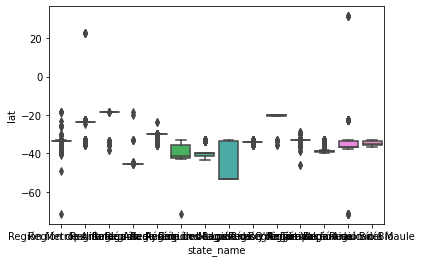

In [134]:
sns.boxplot(x="state_name", y="lat", data=df,
order=["Región Metropolitana", "Región de Antofagasta","Región de Arica","Región de Aysén","Región de Coquimbo",
      "Región de Los Lagos","Región de Los Ríos","Región de Magallanes y Antártica","Región de O'Higgins",
      "Región de Tarapacá","Región de Valparaiso","Región de la Araucanía","Región del Bío Bío","Región del Maule"])

In [135]:
#currency and state_name
df[['currency','state_name']].groupby('state_name').describe().transpose()

state_name      Región Metropolitana  Región de Antofagasta  Región de Arica  \
currency count          43378.000000            2327.000000       156.000000   
         mean               1.502213               1.354534         1.019231   
         std                0.519848               0.496986         0.137777   
         min                0.000000               0.000000         1.000000   
         25%                1.000000               1.000000         1.000000   
         50%                2.000000               1.000000         1.000000   
         75%                2.000000               2.000000         1.000000   
         max                4.000000               2.000000         2.000000   

state_name      Región de Atacama  Región de Aysén  Región de Coquimbo  \
currency count         463.000000        55.000000         2347.000000   
         mean            1.228942         1.200000            1.220281   
         std             0.780903         0.447214            0.437537   
         min             0.000000         0.000000            0.000000   
         25%             1.000000         1.000000            1.000000   
         50%             1.000000         1.000000            1.000000   
         75%             2.000000         1.000000            1.000000   
         max             3.000000         2.000000            2.000000   

state_name      Región de Los Lagos  Región de Los Ríos  \
currency count           303.000000          523.000000   
         mean              1.072607            1.273423   
         std               0.327557            0.467119   
         min               0.000000            0.000000   
         25%               1.000000            1.000000   
         50%               1.000000            1.000000   
         75%               1.000000            2.000000   
         max               3.000000            2.000000   

state_name      Región de Magallanes y Antártica  Región de O'Higgins  \
currency count                         79.000000           663.000000   
         mean                           1.746835             1.357466   
         std                            0.437603             0.495113   
         min                            1.000000             0.000000   
         25%                            1.500000             1.000000   
         50%                            2.000000             1.000000   
         75%                            2.000000             2.000000   
         max                            2.000000             2.000000   

state_name      Región de Tarapacá  Región de Valparaiso  \
currency count           65.000000          18624.000000   
         mean             1.338462              1.296123   
         std              0.476869              0.488491   
         min              1.000000              0.000000   
         25%              1.000000              1.000000   
         50%              1.000000              1.000000   
         75%              2.000000              2.000000   
         max              2.000000              4.000000   

state_name      Región de la Araucanía  Región del Bío Bío  Región del Maule  
currency count             1652.000000         2798.000000       4934.000000  
         mean                 1.266344            1.273052          1.037292  
         std                  0.443548            0.501477          0.195810  
         min                  0.000000            0.000000          0.000000  
         25%                  1.000000            1.000000          1.000000  
         50%                  1.000000            1.000000          1.000000  
         75%                  2.000000            2.000000          1.000000  
         max                  2.000000            3.000000          2.000000

In [136]:
sc_df = pd.crosstab(df.state_name, df.currency,margins=True)

print(tabulate(sc_df,headers ="keys", tablefmt ='fancy_grid',))

╒══════════════════════════════════╤═════╤═══════╤═══════╤═════╤═════╤═══════╕
│ state_name                       │   0 │     1 │     2 │   3 │   4 │   All │
╞══════════════════════════════════╪═════╪═══════╪═══════╪═════╪═════╪═══════╡
│ Región Metropolitana             │ 420 │ 20766 │ 22185 │   1 │   6 │ 43378 │
├──────────────────────────────────┼─────┼───────┼───────┼─────┼─────┼───────┤
│ Región de Antofagasta            │  21 │  1460 │   846 │   0 │   0 │  2327 │
├──────────────────────────────────┼─────┼───────┼───────┼─────┼─────┼───────┤
│ Región de Arica                  │   0 │   153 │     3 │   0 │   0 │   156 │
├──────────────────────────────────┼─────┼───────┼───────┼─────┼─────┼───────┤
│ Región de Atacama                │  67 │   256 │   107 │  33 │   0 │   463 │
├──────────────────────────────────┼─────┼───────┼───────┼─────┼─────┼───────┤
│ Región de Aysén                  │   1 │    42 │    12 │   0 │   0 │    55 │
├──────────────────────────────────┼─────┼───────┼──

In [137]:
df[['currency','state_name']].groupby('state_name').mean()

,currency
state_name,
Región Metropolitana,1.502213
Región de Antofagasta,1.354534
Región de Arica,1.019231
Región de Atacama,1.228942
Región de Aysén,1.200000
Región de Coquimbo,1.220281
Región de Los Lagos,1.072607
Región de Los Ríos,1.273423
Región de Magallanes y Antártica,1.746835


In [138]:
df[['currency','state_name']].groupby('state_name').median()

,currency
state_name,
Región Metropolitana,2.0
Región de Antofagasta,1.0
Región de Arica,1.0
Región de Atacama,1.0
Región de Aysén,1.0
Región de Coquimbo,1.0
Región de Los Lagos,1.0
Región de Los Ríos,1.0
Región de Magallanes y Antártica,2.0


In [139]:
df[['currency','state_name']].groupby('state_name').std()

,currency
state_name,
Región Metropolitana,0.519848
Región de Antofagasta,0.496986
Región de Arica,0.137777
Región de Atacama,0.780903
Región de Aysén,0.447214
Región de Coquimbo,0.437537
Región de Los Lagos,0.327557
Región de Los Ríos,0.467119
Región de Magallanes y Antártica,0.437603


In [140]:
min_ = df[['currency','state_name']].groupby('state_name').min()
min_

,currency
state_name,
Región Metropolitana,0
Región de Antofagasta,0
Región de Arica,1
Región de Atacama,0
Región de Aysén,0
Región de Coquimbo,0
Región de Los Lagos,0
Región de Los Ríos,0
Región de Magallanes y Antártica,1


In [141]:
max_ = df[['currency','state_name']].groupby('state_name').max()
max_

,currency
state_name,
Región Metropolitana,4
Región de Antofagasta,2
Región de Arica,2
Región de Atacama,3
Región de Aysén,2
Región de Coquimbo,2
Región de Los Lagos,3
Región de Los Ríos,2
Región de Magallanes y Antártica,2


In [142]:
Range  = max_-min_
Range

,currency
state_name,
Región Metropolitana,4
Región de Antofagasta,2
Región de Arica,1
Región de Atacama,3
Región de Aysén,2
Región de Coquimbo,2
Región de Los Lagos,3
Región de Los Ríos,2
Región de Magallanes y Antártica,1


In [143]:
Q25 =  df[['currency','state_name']].groupby('state_name').quantile(0.25)
Q25

,currency
state_name,
Región Metropolitana,1.0
Región de Antofagasta,1.0
Región de Arica,1.0
Región de Atacama,1.0
Región de Aysén,1.0
Región de Coquimbo,1.0
Región de Los Lagos,1.0
Región de Los Ríos,1.0
Región de Magallanes y Antártica,1.5


In [144]:
Q75 =  df[['currency','state_name']].groupby('state_name').quantile(0.75)
Q75

,currency
state_name,
Región Metropolitana,2.0
Región de Antofagasta,2.0
Región de Arica,1.0
Región de Atacama,2.0
Región de Aysén,1.0
Región de Coquimbo,1.0
Región de Los Lagos,1.0
Región de Los Ríos,2.0
Región de Magallanes y Antártica,2.0


In [145]:
IQR = Q75-Q25
IQR

,currency
state_name,
Región Metropolitana,1.0
Región de Antofagasta,1.0
Región de Arica,0.0
Región de Atacama,1.0
Región de Aysén,0.0
Región de Coquimbo,0.0
Región de Los Lagos,0.0
Región de Los Ríos,1.0
Región de Magallanes y Antártica,0.5


In [146]:
below_outlier = Q25-1.5*IQR
below_outlier

,currency
state_name,
Región Metropolitana,-0.50
Región de Antofagasta,-0.50
Región de Arica,1.00
Región de Atacama,-0.50
Región de Aysén,1.00
Región de Coquimbo,1.00
Región de Los Lagos,1.00
Región de Los Ríos,-0.50
Región de Magallanes y Antártica,0.75


In [147]:
above_outlier=Q75 + 1.5 *IQR
above_outlier

,currency
state_name,
Región Metropolitana,3.50
Región de Antofagasta,3.50
Región de Arica,1.00
Región de Atacama,3.50
Región de Aysén,1.00
Región de Coquimbo,1.00
Región de Los Lagos,1.00
Región de Los Ríos,3.50
Región de Magallanes y Antártica,2.75


<AxesSubplot:xlabel='state_name', ylabel='currency'>

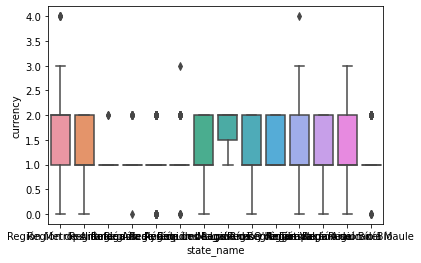

In [148]:
sns.boxplot(x="state_name", y="currency", data=df,
order=["Región Metropolitana", "Región de Antofagasta","Región de Arica","Región de Aysén","Región de Coquimbo",
      "Región de Los Lagos","Región de Los Ríos","Región de Magallanes y Antártica","Región de O'Higgins",
      "Región de Tarapacá","Región de Valparaiso","Región de la Araucanía","Región del Bío Bío","Región del Maule"])

In [ ]:
#examining Q-Q